<h2 style="color: #7B68EE"> 1. Seleccionando y Dividiendo la Data </h2>

<p> ¿Qué se hace en este apartado </p>

<ol>
    <li> Estructura de datos </li>
    <li> Seleccionar datos </li>
    <li> Formato de aprendizaje de Sci-Kit </li>
    <li> Parámetros de ajuste y definición del modelo </li>

<h3 style="color: #778899"> 1.1 Estructura de datos </h3>

In [1]:
import numpy as np
import pandas as pd
import scipy
from math import sqrt
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn import linear_model

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import train_test_split

In [2]:
#data
rawData = pd.read_csv("BancoUnoRegre.csv")
rawData.head()

,ID,LIMIT_BAL,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,PAY_AMT5,PAY_AMT6,female,male,graduate school,high school,other,university,default,not default
0,1,20000,1,24,2,2,-1,-1,-2,-2,...,0,0,1,0,0,0,0,1,1,0
1,2,120000,2,26,-1,2,0,0,0,2,...,0,2000,1,0,0,0,0,1,1,0
2,3,90000,2,34,0,0,0,0,0,0,...,1000,5000,1,0,0,0,0,1,0,1
3,4,50000,1,37,0,0,0,0,0,0,...,1069,1000,1,0,0,0,0,1,0,1
4,5,50000,1,57,-1,0,-1,0,0,0,...,689,679,0,1,0,0,0,1,0,1


In [3]:
rawData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30200 entries, 0 to 30199
Data columns (total 30 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   ID               30200 non-null  int64
 1   LIMIT_BAL        30200 non-null  int64
 2   MARRIAGE         30200 non-null  int64
 3   AGE              30200 non-null  int64
 4   PAY_0            30200 non-null  int64
 5   PAY_2            30200 non-null  int64
 6   PAY_3            30200 non-null  int64
 7   PAY_4            30200 non-null  int64
 8   PAY_5            30200 non-null  int64
 9   PAY_6            30200 non-null  int64
 10  BILL_AMT1        30200 non-null  int64
 11  BILL_AMT2        30200 non-null  int64
 12  BILL_AMT3        30200 non-null  int64
 13  BILL_AMT4        30200 non-null  int64
 14  BILL_AMT5        30200 non-null  int64
 15  BILL_AMT6        30200 non-null  int64
 16  PAY_AMT1         30200 non-null  int64
 17  PAY_AMT2         30200 non-null  int64
 18  PAY_AM

<h3 style="color: #778899"> 1.2 Seleccionar datos </h3>

In [4]:
#features
X = rawData.iloc[:, 4:10]
print('Summary of feature sample')
X.head()

Summary of feature sample


,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
0,2,2,-1,-1,-2,-2
1,-1,2,0,0,0,2
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,-1,0,-1,0,0,0


In [5]:
#dependent variable
y = rawData['not default']

<h3 style="color: #778899"> 1.3 Formato de aprendizaje de Sci-Kit </h3>

In [6]:
from sklearn.linear_model import LinearRegression

<h3 style="color: #778899"> 1.4 Parámetros de ajuste y definición del modelo </h3>

In [7]:
model = LinearRegression(n_jobs=10)

In [8]:
#dependent variable
print(y)

0        0
1        0
2        1
3        1
4        1
        ..
30195    1
30196    1
30197    0
30198    0
30199    0
Name: not default, Length: 30200, dtype: int64


In [9]:
import numpy as np
import pandas as pd
import scipy
from math import sqrt
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import train_test_split

In [10]:
print (y)

0        0
1        0
2        1
3        1
4        1
        ..
30195    1
30196    1
30197    0
30198    0
30199    0
Name: not default, Length: 30200, dtype: int64


In [11]:
print (cross_val_score(model, X, y, cv=3))

[0.09277757 0.11871307 0.11235927]


In [12]:
algosClass = []

algosClass.append (('Random Forest Regressor', RandomForestRegressor()))

algosClass.append(('Linear Regression', LinearRegression()))

algosClass.append (('Support Vector Regression', SVR()))

In [13]:
results =[]
names = []
for name, model in algosClass:
    result = cross_val_score(model, X, y, cv=3, scoring = 'r2')
    names.append (name)
    results.append(result)
    
for i in range (len(names)):
    print(names[i], results[i].mean())

Random Forest Regressor 0.17249059509302758
Linear Regression 0.107949969965357
Support Vector Regression 0.1231808618278581


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(24160, 6) (6040, 6) (24160,) (6040,)


In [15]:
algo = RandomForestRegressor()
models=algo.fit(X_train, y_train)

In [16]:
predictions = models.predict(X_test)

In [17]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

In [18]:
rmse = sqrt(mean_squared_error(y_test, predictions))

In [19]:
predictions = models.predict(X_test)
predRsquared = r2_score(y_test, predictions)
rmse = sqrt(mean_squared_error(y_test, predictions))
print('R Squared: %.3f' %predRsquared)
print('RMSE: %.3f' %rmse)

R Squared: 0.188
RMSE: 0.377


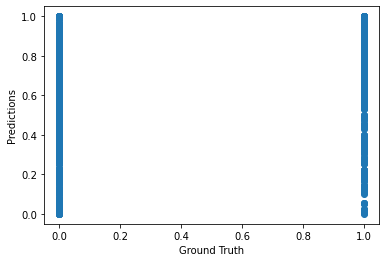

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

x= y_test
y= predictions
plt.scatter(x=y_test, y=predictions)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show();

In [21]:
rawData1= pd.DataFrame({'Actual': y_test, 'Prediction': predictions})
rawData1

,Actual,Prediction
15551,1,0.927036
8041,1,0.856081
10656,0,0.518044
20247,1,0.860113
24161,0,0.896054
...,...,...
17662,1,0.896054
10255,1,0.896054
17277,1,0.560443
4242,1,0.860113


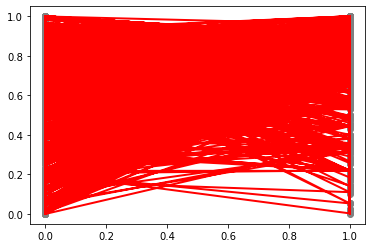

In [22]:
plt.scatter(y_test, predictions, color='gray')
plt.plot(y_test, predictions, color='red', linewidth=2)
plt.show()